In [5]:
#/ A retail company “ABC Private Limited” wants to understand the customer purchase behaviour 
#(specifically, purchase amount) against various products of different categories. 
#They have shared purchase summary of various customers for selected high volume products from last month. 
#The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity),
#product details (productid and product category) and Total purchaseamount from last month.

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
pwd = os.getcwd()

In [8]:
df= pd.read_csv(pwd + '\\train.csv')

Data Overview

In [9]:
df.shape

(550068, 12)

In [10]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [11]:
df.info

<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0     

In [12]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [13]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [14]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [15]:
df.isna().sum().sort_values(ascending=False) / (df.shape[0]) * (100)

Product_Category_3            69.672659
Product_Category_2            31.566643
User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Purchase                       0.000000
dtype: float64

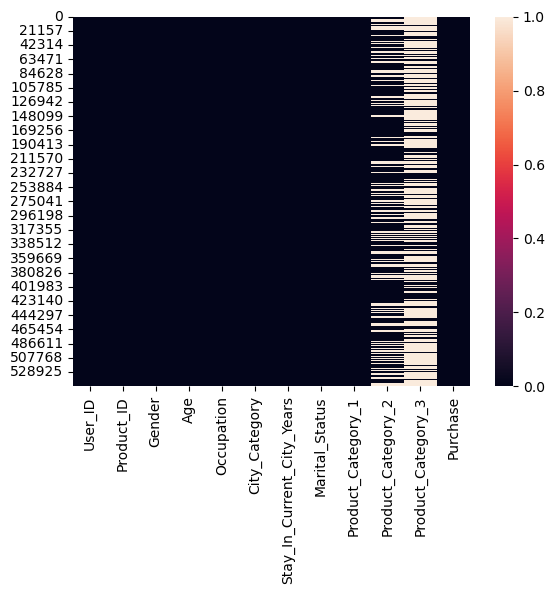

In [16]:
sns.heatmap(df.isnull())
plt.show()

In [17]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [18]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

DATA CLEANING

In [19]:
df.rename(columns= {'City_Category':'City','Stay_In_Current_City_Years':'City_Years','Product_Category_1':'Cat_1', 
'Product_Category_2':'Cat_2','Product_Category_3':'Cat_3'}, inplace=True)

In [20]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City,City_Years,Marital_Status,Cat_1,Cat_2,Cat_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [21]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [22]:
df_2 = df

df_2['Age'].replace('0-17','Child',regex = True, inplace=True)
df_2['Age'].replace('18-25','Teenager',regex = True, inplace=True)
df_2['Age'].replace('26-35','Adult',regex = True, inplace=True)
df_2['Age'].replace('36-45','Adult',regex = True, inplace=True)
df_2['Age'].replace('46-50','Adult',regex = True, inplace=True)
df_2['Age'].replace('51-55','Old',regex = True, inplace=True)
df_2['Age'].replace('55+','Old',regex = True, inplace=True)


In [23]:
df_2.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City,City_Years,Marital_Status,Cat_1,Cat_2,Cat_3,Purchase
0,1000001,P00069042,F,Child,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,Child,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,Child,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,Child,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,Old+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,Adult,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,Adult,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,Adult,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,Adult,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,Adult,20,A,1,1,8,NaN,NaN,7871


In [24]:
df_2['Cat_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [25]:
df_2['Cat_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [26]:
df_2['Cat_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [27]:
df_2['Cat_2'].fillna(0, inplace = True)
df_2['Cat_3'].fillna(0, inplace = True)

In [28]:
df_2['Cat_2'].unique()
df_2['Cat_3'].unique()

array([ 0., 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [29]:
df_2.isnull().sum()

User_ID           0
Product_ID        0
Gender            0
Age               0
Occupation        0
City              0
City_Years        0
Marital_Status    0
Cat_1             0
Cat_2             0
Cat_3             0
Purchase          0
dtype: int64

In [30]:
df_2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

In [31]:
df_2.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City,City_Years,Marital_Status,Cat_1,Cat_2,Cat_3,Purchase
0,1000001,P00069042,F,Child,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,Child,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,Child,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,Child,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,Old+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,Adult,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,Adult,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,Adult,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,Adult,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,Adult,20,A,1,1,8,0.0,0.0,7871


DATA VISUALIZATION 

<Axes: xlabel='Occupation', ylabel='count'>

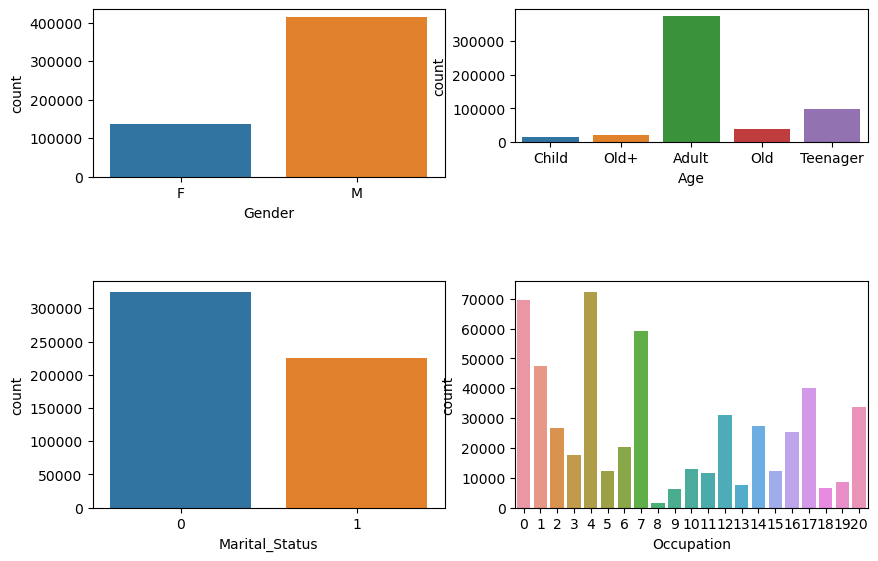

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
sns.countplot(x='Gender',data=df_2)

plt.subplot(5,2,2)
sns.countplot(x='Age',data=df_2)

plt.subplot(3,2,3)
sns.countplot(x='Marital_Status',data=df_2)

plt.subplot(3,2,4)
sns.countplot(x='Occupation',data=df_2)




<Axes: xlabel='Cat_3', ylabel='count'>

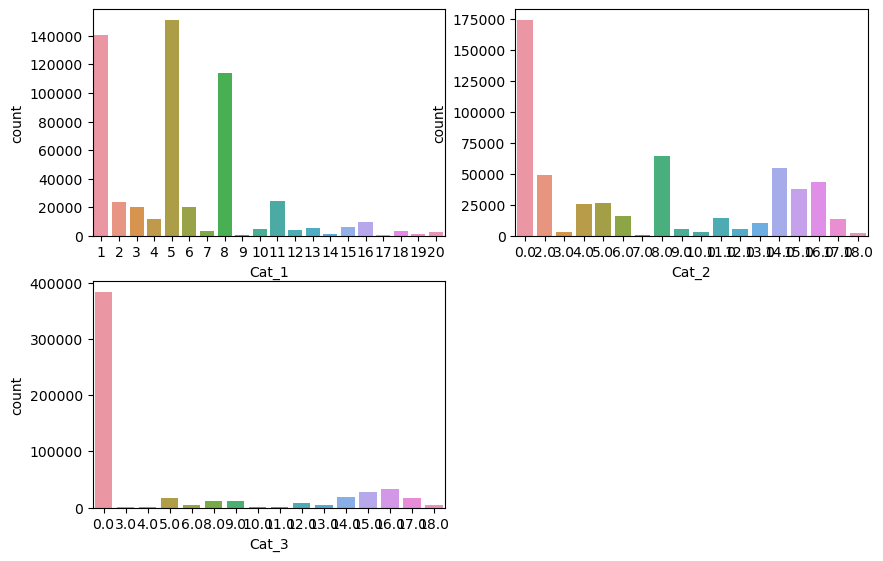

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.countplot(x='Cat_1', data =df_2)

plt.subplot(3,2,2)
sns.countplot(x='Cat_2', data =df_2)

plt.subplot(3,2,3)
sns.countplot(x='Cat_3', data =df_2)

c:\Users\Admin\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Purchase', ylabel='Count'>

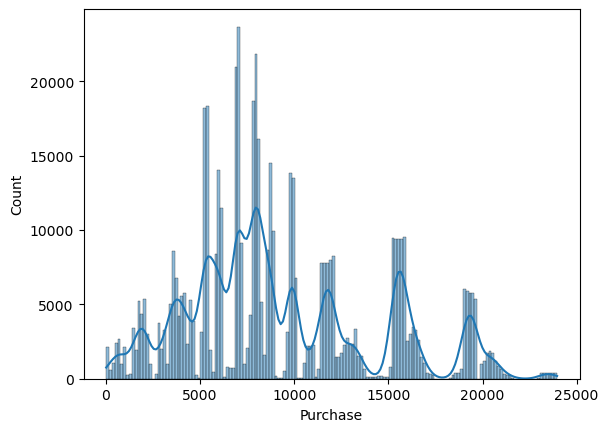

In [34]:

sns.histplot(data=df_2['Purchase'],kde=True)

<Axes: title={'center': 'product 3 vs purchase'}, xlabel='Cat_3', ylabel='Purchase'>

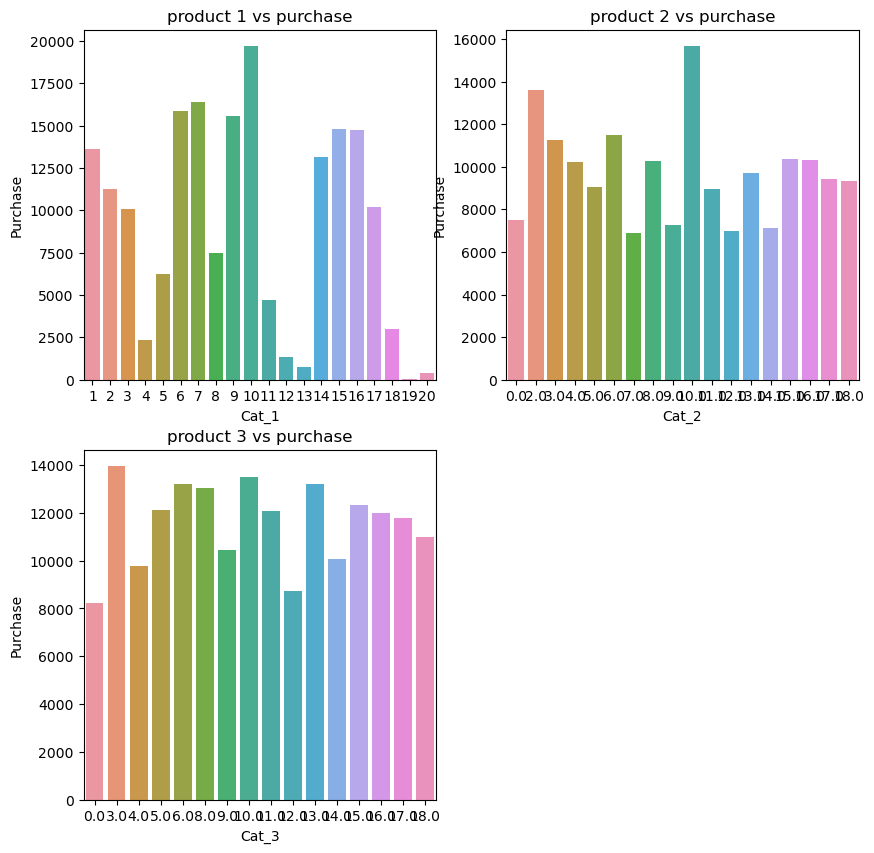

In [35]:
prod1 = df_2.groupby('Cat_1').agg({'Purchase': 'mean'}).reset_index()
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('product 1 vs purchase')
sns.barplot(x='Cat_1', y= 'Purchase', data=prod1)

prod1 = df_2.groupby('Cat_2').agg({'Purchase': 'mean'}).reset_index()
plt.subplot(2,2,2)
plt.title('product 2 vs purchase')
sns.barplot(x='Cat_2', y= 'Purchase', data=prod1)

prod1 = df_2.groupby('Cat_3').agg({'Purchase': 'mean'}).reset_index()
plt.subplot(2,2,3)
plt.title('product 3 vs purchase')
sns.barplot(x='Cat_3', y= 'Purchase', data=prod1)

Text(0.5, 1.0, 'Age VS PURCHASE (Marriage)')

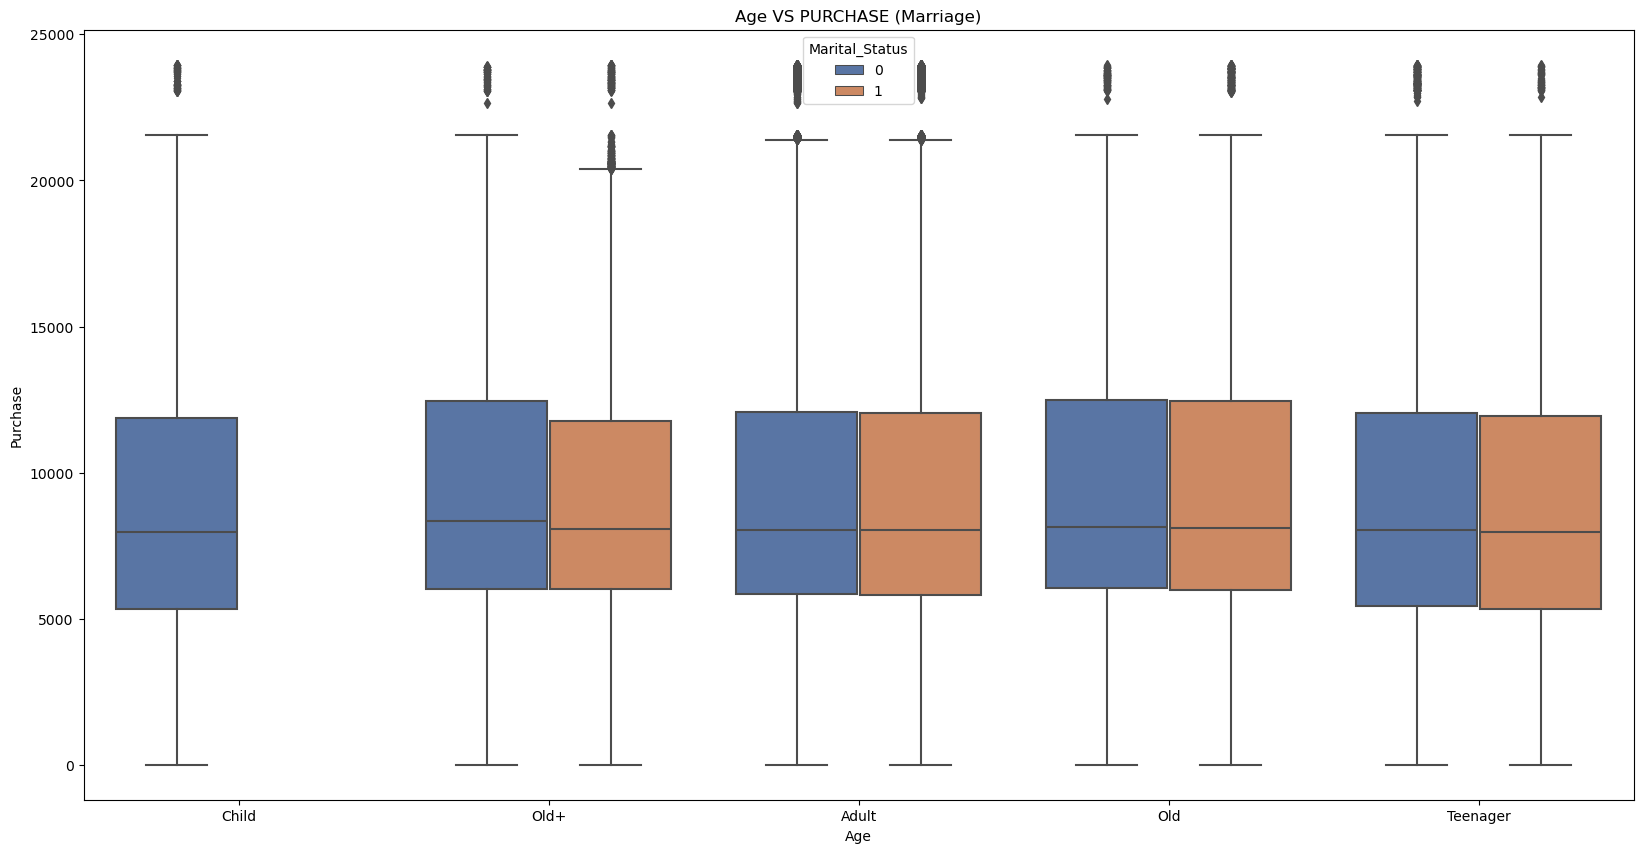

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Age', y='Purchase',hue='Marital_Status',data=df_2,palette="deep")
plt.title('Age VS PURCHASE (Marriage)')

In [37]:
city_group = df_2.groupby('City') 
c_g = city_group.groups.keys()  

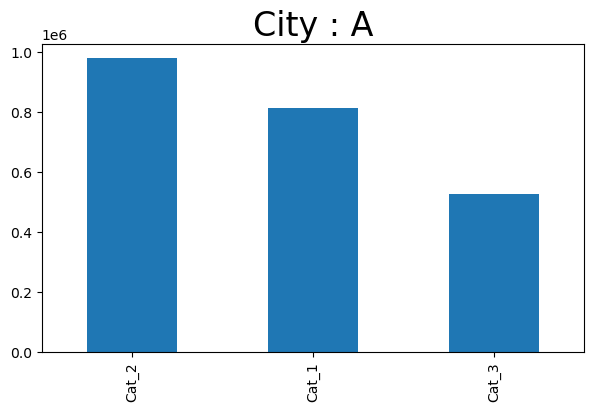

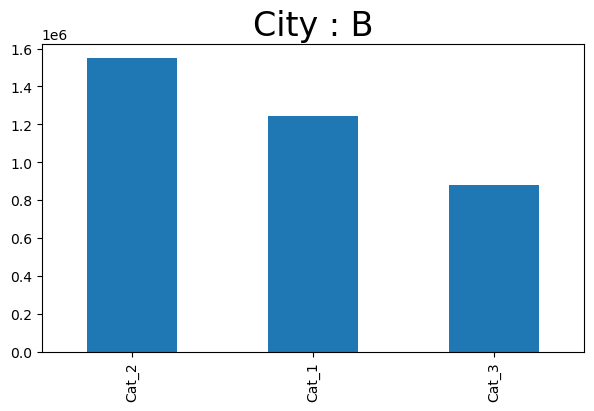

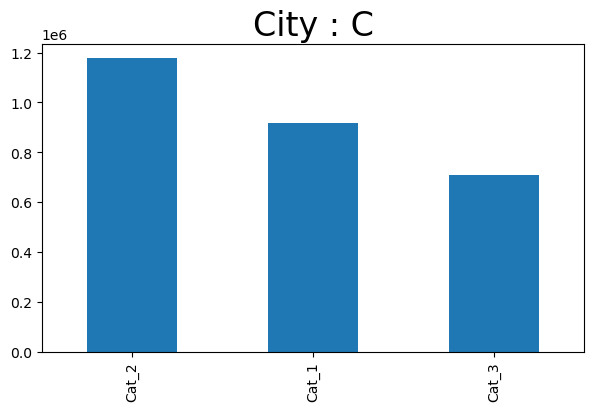

In [44]:
for cat in c_g:
    plt.figure(figsize=(7, 4))
    city_group.get_group(cat)[['Cat_1', 'Cat_2', 'Cat_3']].sum().sort_values(ascending=False).plot(kind='bar')
    plt.title(f'City : {cat}', fontsize=24)
    plt.show()